# Image Classification with Fast.ai

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163).

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

## Getting data from Google Images

### Search and scroll

### Download urls into file

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac


```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
copy(urls.join('\n'));
```

### Create directory and upload urls file into your server

Choose an appropriate name for your labeled images. You can run these steps multiple times to grab different labels.

In [4]:
folder = 'black' 
file = 'urls_black.txt'

In [5]:
path = Path('data/bears2')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [7]:
download_images(path/file, dest, max_pics=500)

Error https://www.washingtonpost.com/resizer/vn6pmHdQPxRzwhhFkpSEsmUp9Qc=/534x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/XK6YBT5GSE2LROLN3FO4WRK5JI.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Error x-raw-image:///b9767d9a6314613444c2e51035d995fa832203544ee1f7b9cab629f12ab1c720 No connection adapters were found for 'x-raw-image:///b9767d9a6314613444c2e51035d995fa832203544ee1f7b9cab629f12ab1c720'
Error https://www.washingtonpost.com/resizer/XWAGVRs4T5IvonuKzhN62sV3pws=/1484x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/4RX4ZXWTQQI6PKMG2CUXODM2HY.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Error https://www.charlotteobserver.com/news/local/p0yxnl/picture65664207/alternates/FREE_1140/CITY_OF_BEARS_10.JPG HTTPSConnectionPool(host='www.charlotteobserver.com', port=443): Read timed out. (read timeout=4)


In [8]:
folder = 'teddys'
file = 'urls_teddys.txt'

In [9]:
path = Path('data/bears2')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [10]:
download_images(path/file, dest, max_pics=500)

Error http://bdfjade.com/data/out/27/5358764-images-of-teddy-bears.jpg HTTPConnectionPool(host='bdfjade.com', port=80): Max retries exceeded with url: /data/out/27/5358764-images-of-teddy-bears.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f7b0469bc18>: Failed to establish a new connection: [Errno -2] Name or service not known',))
Error https://assets.atdw-online.com.au/images/53df19792aaa391551979d9a886d984f.jpeg?rect=224,0,3552,2664&w=800&h=600 HTTPSConnectionPool(host='assets.atdw-online.com.au', port=443): Read timed out. (read timeout=4)
Error https://www.fremantlestory.com.au/media/k2/items/cache/841896f78e48b6ad5be602415c0f36bb_XL.jpg HTTPSConnectionPool(host='www.fremantlestory.com.au', port=443): Max retries exceeded with url: /media/k2/items/cache/841896f78e48b6ad5be602415c0f36bb_XL.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')],)",),))
Error http://i

In [11]:
folder = 'grizzly'
file = 'urls_grizzly.txt'

In [12]:
path = Path('data/bears2')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [13]:
download_images(path/file, dest, max_pics=500)

Error https://blog.patagonia.com/wp-content/uploads/2018/04/gnam_s_0089_1600TCL-1404x778-c-default.jpg HTTPSConnectionPool(host='blog.patagonia.com', port=443): Max retries exceeded with url: /wp-content/uploads/2018/04/gnam_s_0089_1600TCL-1404x778-c-default.jpg (Caused by SSLError(CertificateError("hostname 'blog.patagonia.com' doesn't match either of '*.wpengine.com', 'wpengine.com'",),))
Error https://www.washingtonpost.com/pbox.php?url=http://www.washingtonpost.com/news/animalia/wp-content/uploads/sites/56/2016/06/cub1.jpg&w=1484&op=resize&opt=1&filter=antialias&t=20170517 HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Error https://www.washingtonpost.com/resizer/3XR_4pCQML_c_PWsg5ByKcFsJow=/1484x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/AUEKO7HTGII6RGOCZ7FG7T3BBQ.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Error https://cdnph.upi.com/svc/sv/i/2791538391433/2

In [14]:
path.ls()

[PosixPath('data/bears2/grizzly'),
 PosixPath('data/bears2/urls_black.txt'),
 PosixPath('data/bears2/teddys'),
 PosixPath('data/bears2/urls_teddys.txt'),
 PosixPath('data/bears2/export.pkl'),
 PosixPath('data/bears2/urls_grizzly.txt'),
 PosixPath('data/bears2/black'),
 PosixPath('data/bears2/models')]

In [15]:
classes = ['teddys','grizzly','black']

Then we can remove any images that can't be opened:

In [18]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

teddys


grizzly


black


In [19]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, 
                                  train=".", 
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(), 
                                  size=224, 
                                  num_workers=4).normalize(imagenet_stats)

In [20]:
data.classes

['black', 'grizzly', 'teddys']

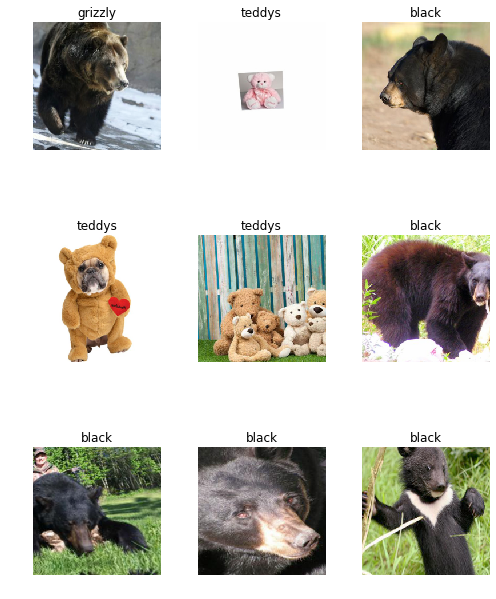

In [21]:
data.show_batch(rows=3, figsize=(7,9))

In [22]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 835, 208)

## Training: resnet34

We use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) as the basis for this model. 


In [23]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [24]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate
1,0.546857,0.059934,0.033654
2,0.314448,0.044350,0.024038


In [25]:
learn.save('stage-1')

## Results

In [26]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

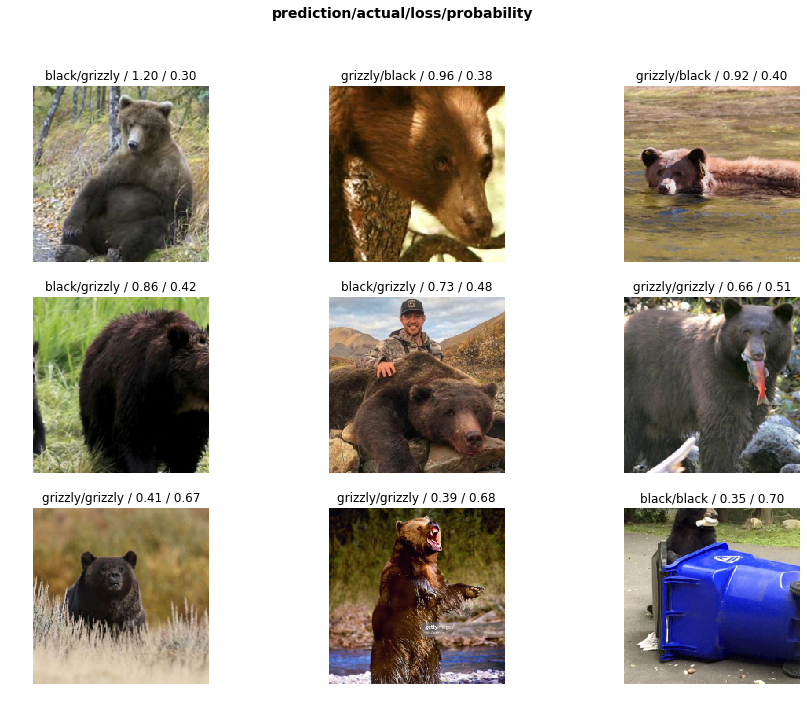

In [27]:
interp.plot_top_losses(9, figsize=(15,11))

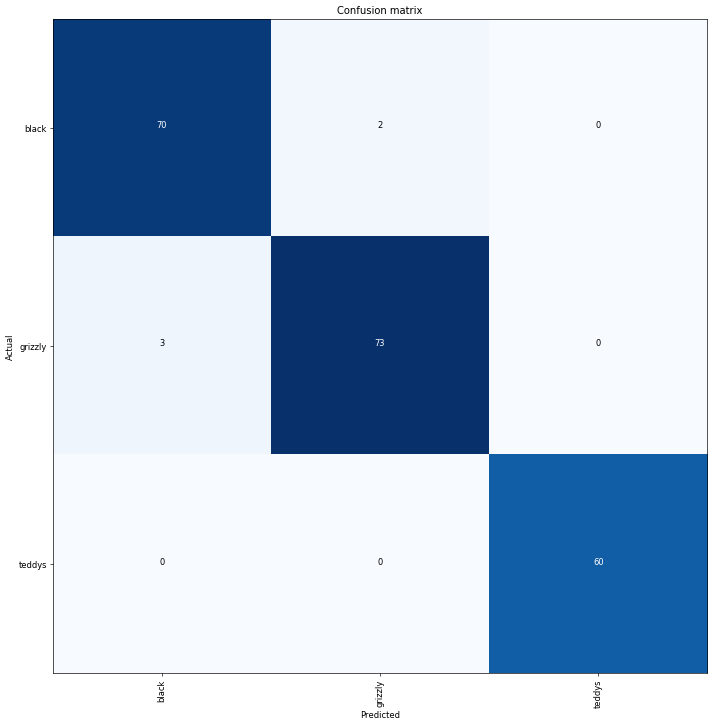

In [28]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [29]:
interp.most_confused(min_val=0)

[('grizzly', 'black', 3), ('black', 'grizzly', 2)]

## Unfreezing, fine-tuning, and learning rates

In [30]:
learn.unfreeze()

In [31]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07


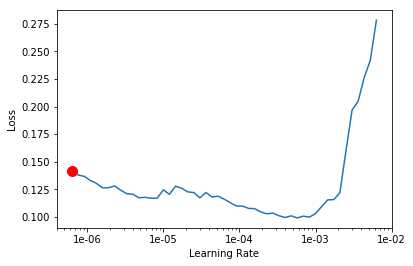

In [32]:
learn.recorder.plot()

In [33]:
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate
1,0.132432,0.044738,0.019231
2,0.129356,0.045985,0.019231
3,0.118352,0.044511,0.019231


In [34]:
learn.export()

## Other data formats

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/mnist_sample')

In [ ]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

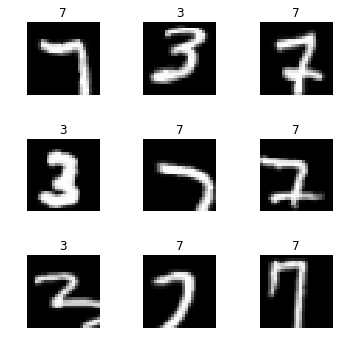

In [ ]:
data.show_batch(rows=3, figsize=(5,5))

In [ ]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)
learn.fit(2)

Total time: 00:23
epoch  train_loss  valid_loss  accuracy
1      0.116117    0.029745    0.991168  (00:12)
2      0.056860    0.015974    0.994603  (00:10)



In [ ]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [ ]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

[0, 1]

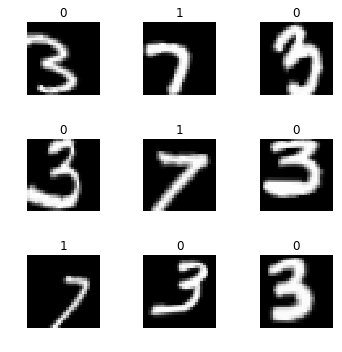

In [ ]:
data.show_batch(rows=3, figsize=(5,5))
data.classes

In [ ]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

[0, 1]

In [ ]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

[PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/mnist_sample/train/3/7463.png'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/mnist_sample/train/3/21102.png')]

In [ ]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [ ]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['3', '7']

In [ ]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [ ]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [ ]:
# Image Classification with Fast.ai

Ensures that any edits you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.

%reload_ext autoreload
%autoreload 2
%matplotlib inline

Import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163).

from fastai.vision import *
from fastai.metrics import error_rate

If you're using a computer with a small GPU, you may get an out of memory error when running the code. If this happens try a smaller batch size:

bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Getting data from Google Images

### Search and scroll

### Download urls into file

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac


```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
copy(urls.join('\n'));
```

### Create directory and upload urls file into your server

Choose an appropriate name for your labeled images. You can run these steps multiple times to grab different labels.

folder = 'black' 
file = 'urls_black.txt'

path = Path('data/bears2')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

download_images(path/file, dest, max_pics=200)

folder = 'teddys'
file = 'urls_teddys.txt'

path = Path('data/bears2')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

download_images(path/file, dest, max_pics=200)

folder = 'grizzly'
file = 'urls_grizzly.txt'

path = Path('data/bears2')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

download_images(path/file, dest, max_pics=200)

path.ls()

classes = ['teddys','grizzly','black']

Then we can remove any images that can't be opened:

for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

data.classes

data.show_batch(rows=3, figsize=(7,9))

data.classes, data.c, len(data.train_ds), len(data.valid_ds)

## Training: resnet34

We use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) as the basis for this model. 


learn = create_cnn(data, models.resnet34, metrics=error_rate)

learn.fit_one_cycle(2)

learn.save('stage-1')

## Results

interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

interp.plot_top_losses(9, figsize=(15,11))

interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

interp.most_confused(min_val=0)

## Unfreezing, fine-tuning, and learning rates

learn.unfreeze()

learn.lr_find()

learn.recorder.plot()

learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-5))

learn.export()

## Other data formats

path = untar_data(URLs.MNIST_SAMPLE); path

tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

data.show_batch(rows=3, figsize=(5,5))

learn = create_cnn(data, models.resnet18, metrics=accuracy)
learn.fit(2)

df = pd.read_csv(path/'labels.csv')
df.head()

data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

data.show_batch(rows=3, figsize=(5,5))
data.classes

data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

fn_paths = [path/name for name in df['name']]; fn_paths[:2]

pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes